In [48]:
import pandas as pd
import joblib
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df=pd.read_csv('messages.csv')
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


<AxesSubplot:>

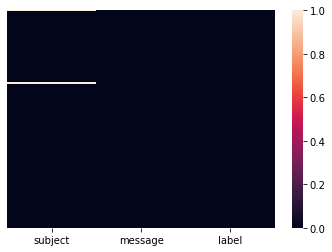

In [52]:
sns.heatmap(df.isnull(),  yticklabels=False)

In [53]:
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [54]:
df.fillna(df['subject'].mode().values[0],inplace=True)

subject    0
message    0
label      0
dtype: int64

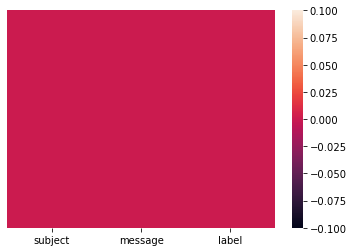

In [55]:
sns.heatmap(df.isnull(),  yticklabels=False)
df.isnull().sum()


In [56]:
df.describe()

,label
count,2893.000000
mean,0.166263
std,0.372381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [57]:
df['sub_mssg']=df['subject']+df['message']
df.head()

,subject,message,label,sub_mssg
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",0,"sociolinguisticslang classification grimes , j..."
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...
3,risk,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...
4,request book information,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...


In [58]:
df['sub_mssg'].describe()

count                                                  2893
unique                                                 2876
top       re := 20 the virtual girlfriend and virtual bo...
freq                                                      4
Name: sub_mssg, dtype: object

In [59]:
df['length']=df['sub_mssg'].apply(len)
df.head()

,subject,message,label,sub_mssg,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...,2895
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",0,"sociolinguisticslang classification grimes , j...",1816
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...,1485
3,risk,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...,328
4,request book information,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...,1070


In [60]:
df.drop('subject',axis=1,inplace=True)


df.head()

,message,label,sub_mssg,length
0,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...,2895
1,"lang classification grimes , joseph e . and ba...",0,"sociolinguisticslang classification grimes , j...",1816
2,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...,1485
3,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...,328
4,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...,1070


In [62]:
import re 

In [63]:
df['sub_mssg']=df['sub_mssg'].str.replace(r'\d+(\.\d+)?', 'numbers',regex=True)


df['sub_mssg']=df['sub_mssg'].str.lower()

df['sub_mssg']=df['sub_mssg'].str.replace(r'\n'," ",regex=True) 

df['sub_mssg']=df['sub_mssg'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','MailID',regex=True)

df['sub_mssg']=df['sub_mssg'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','Links',regex=True)
df['sub_mssg']=df['sub_mssg'].str.replace(r'£|\$', 'Money',regex=True)

df['sub_mssg']=df['sub_mssg'].str.replace(r'\s+', ' ',regex=True)


df['sub_mssg']=df['sub_mssg'].str.replace(r'^\s+|\s+?$', '',regex=True)

df['sub_mssg']=df['sub_mssg'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','contact number',regex=True)
df['sub_mssg']=df['sub_mssg'].str.replace(r"[^a-zA-Z0-9]+", " ",regex=True)


In [64]:
df['Cleaned_Text'] = df['sub_mssg']


In [17]:
df.drop('sub_mssg',axis=1,inplace=True)
df.drop('message',axis=1,inplace=True)

df.head()

,label,length,Cleaned_Text
0,0,2895,job posting apple iss research centercontent l...
1,0,1816,sociolinguisticslang classification grimes jos...
2,0,1485,query letter frequencies for text identificati...
3,0,328,riska colleague and i are researching the diff...
4,0,1070,request book informationearlier this morning i...


0    2412
1     481
Name: label, dtype: int64

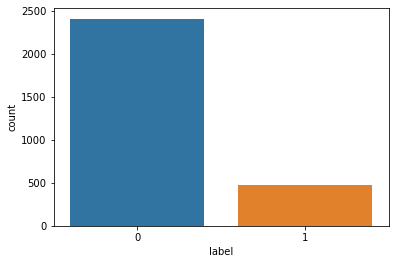

In [18]:
sns.countplot(x = "label", data = df)
df["label"].value_counts()


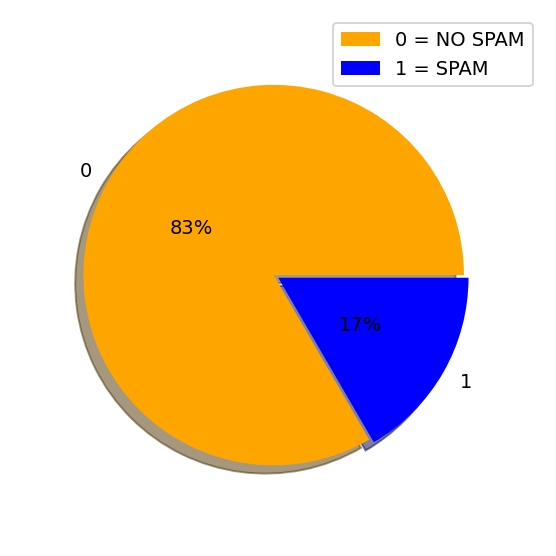

In [19]:
lb=df['label'].value_counts().index.tolist()
val=df['label'].value_counts().values.tolist()
exp=(0.025,0)
clr=('orange','blue')
plt.figure(figsize=(10,5),dpi=140)
plt.pie(x=val,explode=exp,labels=lb,colors=clr,autopct='%2.0f%%',pctdistance=0.5, shadow=True,radius=0.9)
plt.legend(["0 = NO SPAM",'1 = SPAM'])
plt.show()

In [20]:
df.describe()

,label,length
count,2893.000000,2893.000000
mean,0.166263,3262.149326
std,0.372381,3655.249792
min,0.000000,36.000000
25%,0.000000,989.000000
50%,0.000000,2056.000000
75%,0.000000,4061.000000
max,1.000000,28672.000000


In [21]:
hamdf=df[df['label']==0]
spamdf=df[df['label']==1]
hamdf

,label,length,Cleaned_Text
0,0,2895,job posting apple iss research centercontent l...
1,0,1816,sociolinguisticslang classification grimes jos...
2,0,1485,query letter frequencies for text identificati...
3,0,328,riska colleague and i are researching the diff...
4,0,1070,request book informationearlier this morning i...
...,...,...,...
2883,0,2157,evolvable hardware and gppaper now available i...
2885,0,14332,british vs american a sgriffin bacal internet ...
2890,0,1073,anglicization of composers namesjudging from t...
2891,0,3003,re numbers numbers comparative method n ary co...


In [22]:
spamdf=spamdf.sample(hamdf.shape[0],replace=True)

final_dataframe=pd.concat([hamdf,spamdf],axis=0)



0    2412
1    2412
Name: label, dtype: int64

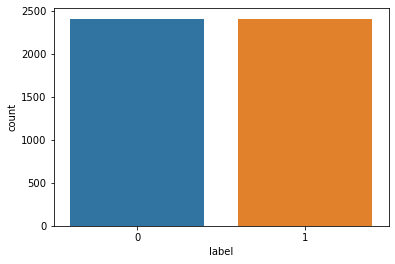

In [23]:
sns.countplot(x = "label", data = final_dataframe)
final_dataframe["label"].value_counts()
final_dataframe["label"].value_counts()

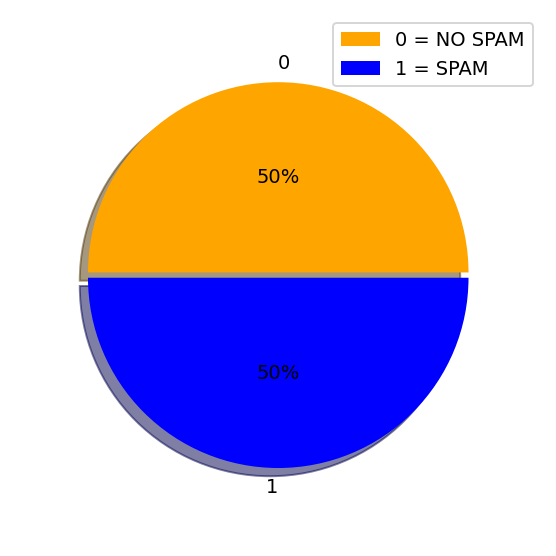

In [24]:
lb=final_dataframe['label'].value_counts().index.tolist()
val=final_dataframe['label'].value_counts().values.tolist()
exp=(0.025,0)
clr=('orange','blue')
plt.figure(figsize=(10,5),dpi=140)
plt.pie(x=val,explode=exp,labels=lb,colors=clr,autopct='%2.0f%%',pctdistance=0.5, shadow=True,radius=0.9)
plt.legend(["0 = NO SPAM",'1 = SPAM'])
plt.show()

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(final_dataframe["Cleaned_Text"],final_dataframe["label"],test_size=0.2,random_state=20,shuffle=True,stratify=final_dataframe["label"])
Y_train.value_counts()
# Y_test.value_counts()



0    1930
1    1929
Name: label, dtype: int64

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
import time
start=time.time()
model=Pipeline([('tfidf',TfidfVectorizer()),("Alg",GradientBoostingClassifier())])

model.fit(X_train,Y_train)
end=time.time()
print(f"Training Time=={end-start}")

Training Time==35.27623462677002


In [27]:
Y_pred=model.predict(X_test)


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)



array([[472,  10],
       [  1, 482]], dtype=int64)

In [29]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       482
           1       0.98      1.00      0.99       483

    accuracy                           0.99       965
   macro avg       0.99      0.99      0.99       965
weighted avg       0.99      0.99      0.99       965



In [30]:
cnf=confusion_matrix(Y_test,Y_pred)

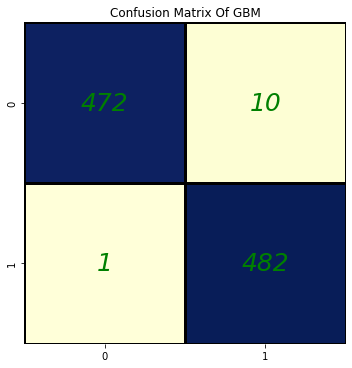

In [31]:
plt.figure(figsize = (5, 5))
annot_kws={'fontsize':25,'fontstyle':'italic','color':"g",'va':'center',"ha":'center','alpha':1,
}
sns.heatmap(pd.DataFrame(confusion_matrix(Y_test,Y_pred)),annot=True, cmap="YlGnBu" ,fmt="d",annot_kws=annot_kws,square=True,cbar=False,linecolor="black",linewidth=3)
plt.tight_layout()
plt.title("Confusion Matrix Of GBM")
plt.ylabel=("Actual Labels")
plt.xlabel= ("Predicted Labels")
plt.show()

In [32]:
df1 = Y_pred

In [33]:
df1 = pd.DataFrame(df1)

In [34]:
df1.rename(columns={0: "Predicted Emails"}, inplace=True)


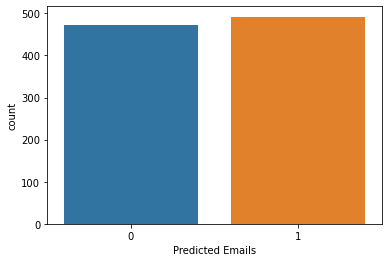

In [35]:
sns.countplot(x = "Predicted Emails", data = df1)
plt.show()


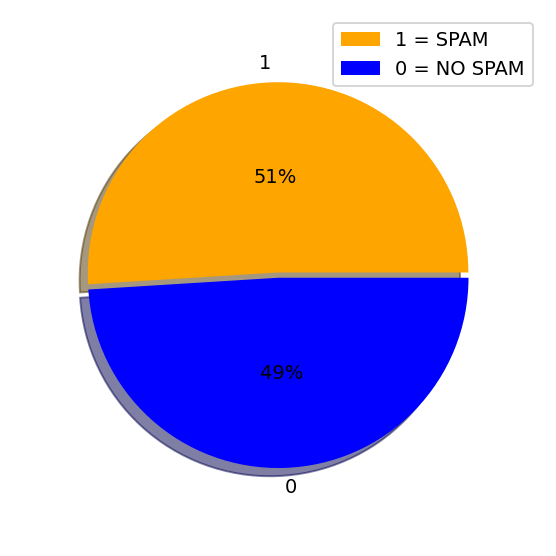

In [36]:
lb=df1["Predicted Emails"].value_counts().index.tolist()
val=df1["Predicted Emails"].value_counts().values.tolist()
exp=(0.025,0)
clr=('orange','blue')
plt.figure(figsize=(10,5),dpi=140)
plt.pie(x=val,explode=exp,labels=lb,colors=clr,autopct='%2.0f%%',pctdistance=0.5, shadow=True,radius=0.9)
plt.legend(['1 = SPAM',"0 = NO SPAM"])
plt.show()

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
print(accuracy_score(Y_test,Y_pred))

0.9886010362694301


In [39]:
joblib.dump(model,"xgboost.pkl")

['xgboost.pkl']

TypeError: 'str' object is not callable

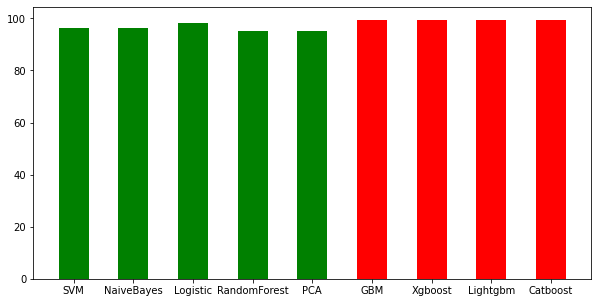

In [45]:
global str
# Dataset generation
data_dict = {'SVM':96.15, 'NaiveBayes':96.15, 'Logistic':98.07,'RandomForest':95,'PCA':95, 'GBM':99.27, 'Xgboost':99.37,'Lightgbm':99.37,'Catboost':99.37 }
Algorithms = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
colors=['green','green','green','green','green','red','red','red','red']
plt.bar(Algorithms, values, color =colors,
        width = 0.5)
plt.xlabel("Accuracy")
plt.ylabel("Accuracy Percentage")
plt.title("Comparison of Classifiers")
plt.show()